# Session 1 — Data Engineering Overview & First SQL

Understand the DE lifecycle and run your first SQL queries. Includes simple seaborn plots on synthetic data.


# 🧠 Data Engineering Overview — SQL & Databases

---

## 1️⃣ About SQL and Databases

**Structured Query Language (SQL)** is the universal language for managing and manipulating **relational data**.  
It enables you to:
- **Create** tables and schemas (`CREATE TABLE`)
- **Insert** or **update** data (`INSERT`, `UPDATE`)
- **Retrieve** insights (`SELECT`)
- **Control transactions** (`BEGIN`, `COMMIT`, `ROLLBACK`)

A **database** is an organized collection of data stored in structured form and managed by a **Database Management System (DBMS)** such as:
- **PostgreSQL**, **MySQL**, **SQLite** (open-source)
- **Oracle**, **SQL Server** (enterprise)

### ⚙️ How It Works
1. A **client** (app, Python script, or BI tool) sends a SQL query.  
2. The **database engine** parses, optimizes, and executes the query.  
3. The **storage layer** retrieves the data from tables and returns results to the client.

> 💡 SQL is **declarative** — you tell the database *what* you want, not *how* to do it.  
> The engine handles indexing, caching, concurrency, and durability behind the scenes.


## 2️⃣ OLTP vs OLAP (Dell Laptop Example)

### 🧾 OLTP — Online Transaction Processing
- **Focus:** Real-time handling of small, frequent transactions.  
- **Use Case:** Dell’s order management system recording customer purchases.  
- **Operations:** `INSERT`, `UPDATE`, `DELETE` (fast, frequent).  
- **Schema:** Highly normalized (3NF).  
- **Data Volume:** Small per transaction but many transactions per second.

**Example:**  
A customer places an order for **25 laptops** on Dell’s website.
- The OLTP system stores the order: `OrderID`, `CustomerID`, `ProductID`, `Quantity`, `Status`.  
- It updates **inventory**, confirms **payment**, and logs the **transaction**.  
- All of this happens in **milliseconds**.

---

### 📊 OLAP — Online Analytical Processing
- **Focus:** Complex, aggregated analytical queries.  
- **Use Case:** Dell’s data warehouse for analyzing monthly laptop sales by region.  
- **Operations:** `SELECT`, `GROUP BY`, `JOIN` (read-heavy).  
- **Schema:** Denormalized (Star/Snowflake).  
- **Data Volume:** Large; fewer but more complex queries.

**Example:**  
The OLAP system (data warehouse) receives data from OLTP through ETL/ELT pipelines and computes:
- Total laptops sold per region  
- Average order size  
- Sales trends over time  

| Feature | OLTP | OLAP |
|----------|------|------|
| **Purpose** | Real-time transaction processing | Analytical reporting |
| **Operations** | Insert / Update / Delete | Complex Select / Aggregate |
| **Schema** | Normalized (3NF) | Denormalized (Star/Snowflake) |
| **Users** | Application users | Analysts / BI teams |
| **Latency** | Milliseconds | Minutes or hours |

## 3️⃣ Database Normalization — 1NF, 2NF, 3NF

**Normalization** organizes data to reduce redundancy and improve consistency.

| **Normal Form** | **Rule** | **Fix Example** |
|------------------|----------|------------------|
| **1NF** | Each field holds **atomic (single)** values. | Split comma-separated items into separate rows. |
| **2NF** | In 1NF and every non-key column depends on the **entire key**. | Move repeating customer data into a separate table. |
| **3NF** | In 2NF and no transitive dependencies between non-key columns. | Remove “city” dependency from “zipcode.” |

### 🧩 Example

**Before Normalization:**

| OrderID | CustomerName | Product | City | Zip |
|----------|---------------|----------|------|-----|
| 101 | Alice | Laptop | Austin | 73301 |

**After Normalization:**
- **Customers**(`CustomerID`, `Name`, `City`, `Zip`)  
- **Orders**(`OrderID`, `CustomerID`, `ProductID`, `Qty`)  
- **Products**(`ProductID`, `Name`, `Price`)

> 💡 Normalization helps OLTP systems stay consistent and reduces data duplication.  
> OLAP systems, however, often use **denormalized schemas** for faster analytics.


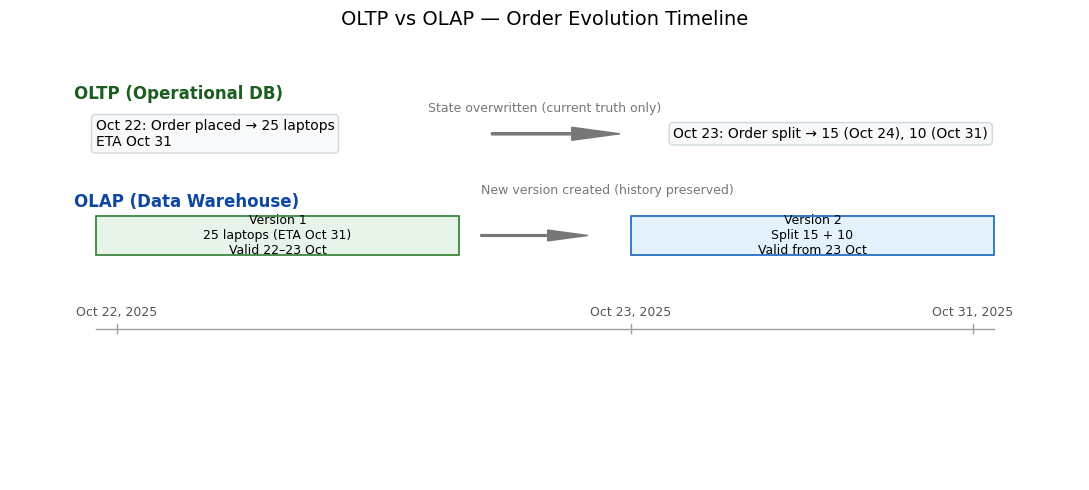

In [17]:
# Refined OLTP vs OLAP Timeline with balanced spacing & consistent layout
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow, Rectangle

fig, ax = plt.subplots(figsize=(11, 5))
ax.set_axis_off()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("OLTP vs OLAP — Order Evolution Timeline", fontsize=14, pad=16)

# ---------- Row labels ----------
ax.text(0.06, 0.88, "OLTP (Operational DB)", fontsize=12, fontweight="bold", color="#0d47a1")
ax.text(0.06, 0.63, "OLAP (Data Warehouse)", fontsize=12, fontweight="bold", color="#0d47a1")

# ---------- OLTP row ----------
# Left label (Day 0)
ax.text(
    0.08, 0.80,
    "Oct 22: Order placed → 25 laptops\nETA Oct 31",
    fontsize=10, va="center", ha="left",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="#f8f9fa", edgecolor="#cfd8dc")
)

# Right label (Day 1)
ax.text(
    0.62, 0.80,
    "Oct 23: Order split → 15 (Oct 24), 10 (Oct 31)",
    fontsize=10, va="center", ha="left",
    bbox=dict(boxstyle="round,pad=0.3", facecolor="#f8f9fa", edgecolor="#cfd8dc")
)

# Arrow showing overwrite (OLTP current truth)
ax.add_patch(FancyArrow(0.45, 0.80, 0.12, 0.0, width=0.005,
                        head_width=0.03, color="#777", length_includes_head=True))
ax.text(0.50, 0.85, "State overwritten (current truth only)", fontsize=9, color="#777", ha="center")

# ---------- OLAP row ----------
# Add vertical space (moved OLAP row slightly down)
olap_y = 0.63  # row height baseline for OLAP boxes
box_height = 0.09
gap = 0.02     # small vertical gap for better readability

# Left (Version 1)
ax.add_patch(Rectangle((0.08, olap_y - box_height - gap), 0.34, box_height,
                       facecolor="#e6f4ea", edgecolor="#2e7d32", lw=1.2))
ax.text(
    0.08 + 0.34/2, olap_y - box_height/2 - gap,
    "Version 1\n25 laptops (ETA Oct 31)\nValid 22–23 Oct",
    ha="center", va="center", fontsize=9
)

# Right (Version 2)
ax.add_patch(Rectangle((0.58, olap_y - box_height - gap), 0.34, box_height,
                       facecolor="#e3f2fd", edgecolor="#1565c0", lw=1.2))
ax.text(
    0.58 + 0.34/2, olap_y - box_height/2 - gap,
    "Version 2\nSplit 15 + 10\nValid from 23 Oct",
    ha="center", va="center", fontsize=9
)

# Arrow showing new version creation
ax.add_patch(FancyArrow(0.44, olap_y - box_height/2 - gap, 0.10, 0.0,
                        width=0.004, head_width=0.025, color="#777", length_includes_head=True))
ax.text(0.44, olap_y + 0.03, "New version created (history preserved)", fontsize=9, color="#777", ha="left")

# ---------- Timeline (bottom) ----------
ax.text(0.10, 0.38, "Oct 22, 2025", fontsize=9, color="#555", ha="center")
ax.text(0.58, 0.38, "Oct 23, 2025", fontsize=9, color="#555", ha="center")
ax.text(0.90, 0.38, "Oct 31, 2025", fontsize=9, color="#555", ha="center")

# Horizontal line and ticks
ax.plot([0.08, 0.92], [0.35, 0.35], color="#9e9e9e", lw=1)
for x in [0.10, 0.58, 0.90]:
    ax.plot([x, x], [0.34, 0.36], color="#9e9e9e", lw=1)

plt.tight_layout()
plt.savefig("oltp_olap_timeline_aligned.png", dpi=220, bbox_inches="tight")
plt.show()


# Real Time Example for OLTP vs OLAP Data Storage

# 💽 OLTP vs OLAP — Day-by-Day Example (Dell Order Split Scenario)

---

## 🧭 Business Scenario

- **Oct 22 2025:** A customer orders **25 Dell laptops**, ETA = **Oct 31**  
- **Oct 23 2025:** Customer changes the order → **15 units ETA Oct 24** + **10 units ETA Oct 31**  
- **Oct 24 2025:** First 15 ship  
- **Oct 31 2025:** Remaining 10 ship  

We’ll see how this looks in:
1. **OLTP** — the operational database (current truth)  
2. **OLAP** — the warehouse (historical truth with SCD Type 2)

---

## 🧱 1️⃣ OLTP Schema (Normalized)

```sql
CREATE TABLE orders(
  order_id      INTEGER PRIMARY KEY,
  customer_id   TEXT NOT NULL,
  order_date    DATE NOT NULL,
  status        TEXT NOT NULL,
  promised_eta  DATE
);

CREATE TABLE order_items(
  order_id     INTEGER,
  product_id   TEXT,
  qty_ordered  INTEGER,
  unit_price   NUMERIC(10,2),
  PRIMARY KEY(order_id, product_id),
  FOREIGN KEY(order_id) REFERENCES orders(order_id)
);

CREATE TABLE shipments(
  shipment_id       TEXT PRIMARY KEY,
  order_id          INTEGER,
  eta               DATE,
  planned_ship_date DATE,
  actual_ship_date  DATE,
  status            TEXT,
  FOREIGN KEY(order_id) REFERENCES orders(order_id)
);

CREATE TABLE shipment_items(
  shipment_id TEXT,
  product_id  TEXT,
  qty         INTEGER,
  PRIMARY KEY(shipment_id, product_id),
  FOREIGN KEY(shipment_id) REFERENCES shipments(shipment_id)
);

CREATE TABLE order_events(
  order_id   INTEGER,
  event_ts   TIMESTAMP,
  event_type TEXT,
  details_json TEXT
);


## OLTP State by Day

## 📅 Day 0 — Oct 22 (Initial Order)

### 🧾 orders

| order_id | customer_id | order_date | status | promised_eta |
|-----------|--------------|-------------|---------|---------------|
| 9001 | C-123 | 2025-10-22 | PLACED | 2025-10-31 |

---

### 📦 order_items

| order_id | product_id | qty_ordered | unit_price |
|-----------|-------------|--------------|-------------|
| 9001 | DELL-LAPTOP-15 | 25 | 1200.00 |

---

### 🚚 shipments

| shipment_id | order_id | eta | planned_ship_date | actual_ship_date | status |
|--------------|-----------|------|--------------------|------------------|---------|
| S-1 | 9001 | 2025-10-31 | NULL | NULL | PLANNED |

---

### 📦 shipment_items

| shipment_id | product_id | qty |
|--------------|-------------|-----|
| S-1 | DELL-LAPTOP-15 | 25 |


## 📅 Day 1 — Oct 23 (Order Split)

### 🧾 orders

| order_id | customer_id | order_date | status | promised_eta |
|-----------|--------------|-------------|---------|---------------|
| 9001 | C-123 | 2025-10-22 | AMENDED | 2025-10-31 |

---

### 🚚 shipments

| shipment_id | order_id | eta | planned_ship_date | actual_ship_date | status |
|--------------|-----------|------|--------------------|------------------|---------|
| S-1 | 9001 | 2025-10-31 | NULL | NULL | PLANNED |
| S-2 | 9001 | 2025-10-24 | NULL | NULL | PLANNED |

---

### 📦 shipment_items

| shipment_id | product_id | qty |
|--------------|-------------|-----|
| S-1 | DELL-LAPTOP-15 | 10 |
| S-2 | DELL-LAPTOP-15 | 15 |



## 📅 Day 2 — Oct 24 (First Shipment Shipped)

### 🚚 shipments

| shipment_id | order_id | eta | planned_ship_date | actual_ship_date | status |
|--------------|-----------|------|--------------------|------------------|---------|
| S-1 | 9001 | 2025-10-31 | NULL | NULL | PLANNED |
| S-2 | 9001 | 2025-10-24 | NULL | 2025-10-24 | SHIPPED |


## 📅 Day 3 — Oct 31 (All Shipped)

### 🚚 shipments

| shipment_id | order_id | eta | planned_ship_date | actual_ship_date | status |
|--------------|-----------|------|--------------------|------------------|---------|
| S-1 | 9001 | 2025-10-31 | NULL | 2025-10-31 | SHIPPED |
| S-2 | 9001 | 2025-10-24 | NULL | 2025-10-24 | SHIPPED |


## Day 3 — Oct 31 (All Shipped)

shipments

|S-1|…|2025-10-31|NULL|2025-10-31|SHIPPED|
|S-2|…|2025-10-24|NULL|2025-10-24|SHIPPED|



# Summary

### 🟢 OLTP focus: shows the current operational state only;
### history lives in order_events.

## 🗄️ OLAP Schema (Star Model)

```sql 

CREATE TABLE DimOrder(
  order_sk     INTEGER PRIMARY KEY,
  order_id     INTEGER,
  promised_eta DATE,
  status       TEXT,
  valid_from   DATE,
  valid_to     DATE,
  is_current   BOOLEAN
);

CREATE TABLE FactOrderItem(
  order_id     INTEGER,
  product_id   TEXT,
  qty_ordered  INTEGER,
  unit_price   NUMERIC(10,2),
  load_dt      DATE
);

CREATE TABLE FactShipment(
  shipment_id      TEXT,
  order_id         INTEGER,
  product_id       TEXT,
  qty              INTEGER,
  planned_eta      DATE,
  actual_ship_date DATE,
  status           TEXT,
  load_dt          DATE
);

CREATE TABLE FactOrderSnapshot(
  snapshot_dt      DATE,
  order_id         INTEGER,
  status           TEXT,
  promised_eta     DATE,
  total_planned_qty INTEGER,
  total_shipped_qty INTEGER
);


# OLAP Loads Day-by-Day

## 🌙 Night of Oct 22 (Initial Load)

### 🧾 DimOrder

| order_sk | order_id | promised_eta | status | valid_from | valid_to | is_current |
|-----------|-----------|---------------|----------|--------------|-------------|-------------|
| 101 | 9001 | 2025-10-31 | PLACED | 2025-10-22 | 9999-12-31 | 1 |

---

### 📦 FactOrderItem

| order_id | product_id | qty_ordered | unit_price | load_dt |
|-----------|-------------|--------------|-------------|----------|
| 9001 | DELL-LAPTOP-15 | 25 | 1200.00 | 2025-10-22 |

---

### 🚚 FactShipment

| shipment_id | order_id | product_id | qty | planned_eta | actual_ship_date | status | load_dt |
|--------------|-----------|-------------|-----|----------------|------------------|----------|----------|
| S-1 | 9001 | DELL-LAPTOP-15 | 25 | 2025-10-31 | NULL | PLANNED | 2025-10-22 |


## 🌙 Night of Oct 23 (Amendment Detected)

### 🧾 DimOrder

| order_sk | order_id | promised_eta | status  | valid_from | valid_to   | is_current |
|-----------|-----------|---------------|----------|--------------|-------------|-------------|
| 101 | 9001 | 2025-10-31 | PLACED  | 2025-10-22 | 2025-10-23 | 0 |
| 102 | 9001 | 2025-10-31 | AMENDED | 2025-10-23 | 9999-12-31 | 1 |

---

### 🚚 FactShipment

| shipment_id | order_id | product_id | qty | planned_eta | actual_ship_date | status | load_dt |
|--------------|-----------|-------------|-----|--------------|------------------|---------|----------|
| S-1 | 9001 | DELL-LAPTOP-15 | 10 | 2025-10-31 | NULL | PLANNED | 2025-10-23 |
| S-2 | 9001 | DELL-LAPTOP-15 | 15 | 2025-10-24 | NULL | PLANNED | 2025-10-23 |

---

### 📊 FactOrderSnapshot

| snapshot_dt | order_id | status  | promised_eta | total_planned_qty | total_shipped_qty |
|--------------|-----------|----------|---------------|--------------------|--------------------|
| 2025-10-23 | 9001 | AMENDED | 2025-10-31 | 25 | 0 |


## 🌙 Night of Oct 24 (First Shipment Shipped)

### 🚚 FactShipment

| shipment_id | order_id | product_id | qty | planned_eta | actual_ship_date | status  | load_dt |
|--------------|-----------|-------------|-----|--------------|------------------|----------|----------|
| S-2 | 9001 | DELL-LAPTOP-15 | 15 | 2025-10-24 | 2025-10-24 | SHIPPED | 2025-10-24 |

---

### 📊 FactOrderSnapshot

| snapshot_dt | order_id | status | promised_eta | total_planned_qty | total_shipped_qty |
|--------------|-----------|---------|---------------|--------------------|--------------------|
| 2025-10-24 | 9001 | PARTIALLY_SHIPPED | 2025-10-31 | 25 | 15 |


## 🌙 Night of Oct 31 (Final Shipment Shipped)

### 🚚 FactShipment

| shipment_id | order_id | product_id | qty | planned_eta | actual_ship_date | status  | load_dt |
|--------------|-----------|-------------|-----|--------------|------------------|----------|----------|
| S-1 | 9001 | DELL-LAPTOP-15 | 10 | 2025-10-31 | 2025-10-31 | SHIPPED | 2025-10-31 |

---

### 📊 FactOrderSnapshot

| snapshot_dt | order_id | status | promised_eta | total_planned_qty | total_shipped_qty |
|--------------|-----------|---------|---------------|--------------------|--------------------|
| 2025-10-31 | 9001 | SHIPPED | 2025-10-31 | 25 | 25 |


# Summary

🟦 OLAP focus: keeps all versions and facts — you can query “as of Oct 22” or “as of Oct 31”.

## 🖼️ Recommended Diagrams

Below are the conceptual visuals you can include alongside this section:

1. **SQL Architecture**
   - SQL Client → Database Engine → Storage Layer
   - Show query flow and result return

2. **OLTP vs OLAP (Dell Example)**
   - Dell order process → OLTP for transactions → OLAP for reporting

3. **Normalization Levels**
   - Unnormalized → 1NF → 2NF → 3NF  
   - Highlight how data splits into multiple linked tables


## ✨ Summary

- SQL is the foundation of **data engineering** — connecting applications, pipelines, and analytics.  
- OLTP handles day-to-day operations, while OLAP drives business insight.  
- Normalization ensures consistency; denormalization powers analytics.  
- A strong understanding of these principles forms the base for advanced topics like **data modeling, ETL, and warehouse design**.

# Key Takeaways

| Feature | OLTP | OLAP |
|----------|------|------|
| **Purpose** | Run the business now | Analyze the business over time |
| **Behaviour on Change** | Overwrites rows → current state| Inserts new version → keeps history |
| **Schema** | Normalized (3NF) | Denormalized (Star/Snowflake) |
| **Query Type** | “What should ship today?” | “How did orders evolve this week?” |
| **Example Data** | 15 + 10 split (current truth) | 25 initial → 15 + 10 versions (saved)|


## 🧩 In summary:
## OLTP is your real-time system of record; OLAP is your system of insight.
## The first updates rows for speed and accuracy; the second appends history for analytics and trend analysis.

## Environment Setup

In [9]:
import sys, sqlite3, pandas as pd, numpy as np, matplotlib.pyplot as plt
print(sys.version)
import seaborn as sns
sns.set_theme()
from pathlib import Path
DB_PATH = Path('course.db')
conn = sqlite3.connect(DB_PATH)
conn.execute('PRAGMA foreign_keys=ON;')
print('SQLite ready at', DB_PATH.resolve())

3.11.9 (v3.11.9:de54cf5be3, Apr  2 2024, 07:12:50) [Clang 13.0.0 (clang-1300.0.29.30)]
SQLite ready at /Users/subhasht/Desktop/VSCode Programs/GenAI_Curriculum/Phase1/Data_Engineering/course.db


In [10]:
def run_sql(q, params=None):
    params = params or {}
    df = pd.read_sql_query(q, conn, params=params)
    display(df)
    return df

## 1. Data Engineering in a Nutshell
**Lifecycle:** Ingest → Validate/Clean → Transform/Model → Store → Serve/Analyze → Orchestrate/Monitor  
**Why SQL?** It's the universal language for querying structured data, building transformations, and validating quality.

### Simple Data Pipeline Diagram (ASCII)
```
Sources -> [Ingest] -> [Staging] -> [Clean/Validate] -> [Transform] -> [Serve (BI/Data Science)]
```

In [11]:
# Seed two tiny tables
conn.executescript('''
DROP TABLE IF EXISTS customers;
DROP TABLE IF EXISTS products;
CREATE TABLE customers(
  customer_id INTEGER PRIMARY KEY,
  name TEXT NOT NULL,
  city TEXT,
  country TEXT,
  address TEXT
);
CREATE TABLE products(
  product_id INTEGER PRIMARY KEY,
  product TEXT NOT NULL,
  price REAL NOT NULL CHECK(price>=0)
);
INSERT INTO customers(name,city,country,address) VALUES
 ('Aria','Austin','USA','1 River Rd'),
 ('Ben','Berlin','Germany','Karlstr. 9'),
 ('Chloe','Chicago','USA',NULL),
 ('Dai','Denver','USA','11 Pine St');
INSERT INTO products(product,price) VALUES
 ('Keyboard',39.99),('Mouse',19.5),('Monitor',189.0),('USB-C Cable',9.99);
'''); conn.commit()
print("Seeded tables.")

Seeded tables.


## 2. First SQL Queries

In [12]:
run_sql("SELECT * FROM customers ORDER BY city, name;");
run_sql("SELECT product, price FROM products ORDER BY price DESC;");

,customer_id,name,city,country,address
0,1,Aria,Austin,USA,1 River Rd
1,2,Ben,Berlin,Germany,Karlstr. 9
2,3,Chloe,Chicago,USA,None
3,4,Dai,Denver,USA,11 Pine St


,product,price
0,Monitor,189.00
1,Keyboard,39.99
2,Mouse,19.50
3,USB-C Cable,9.99


## 3. Quick EDA with seaborn

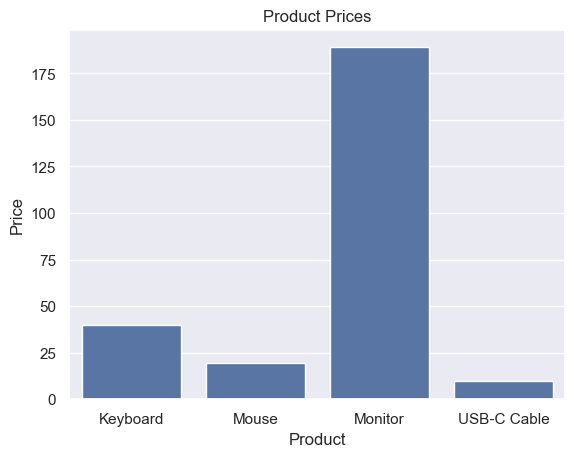

In [13]:
dfp = pd.read_sql_query("SELECT * FROM products;", conn)
sns.barplot(data=dfp, x="product", y="price")
plt.title("Product Prices")
plt.xlabel("Product"); plt.ylabel("Price"); plt.show()